## Regression Model 

In [2]:
# Imports
from sklearn.linear_model import LinearRegression
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt


In [62]:
# Load CS data & reshape to quarterly 
CS = pd.read_csv('CS.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
CS = CS.resample('Q').last()
CS = CS.iloc[:-1]
CS.shape

(137, 1)

In [63]:
# Load features in DF
feat = pd.read_csv('features.csv',index_col=0, parse_dates=True, infer_datetime_format=True)
feat = feat.loc[CS.index[0]:CS.index[-1]]
feat.shape

(137, 9)

In [65]:
# Create features (X) and target (y) by taking the pct_change to predict pct_change of CS value 
X = feat.diff().dropna()
y = CS.diff().dropna()

In [66]:
# Create Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [69]:
predicted_y_values = model.predict(X)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [71]:
# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.5233561403437386.
The r2 is 0.5233561403437386.
The mean squared error is 3.865724384466185.
The root mean squared error is 1.9661445482126143.
The standard deviation is Case-Shiller U.S. National Home Price Index    2.847859
dtype: float64.


In [72]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Case-Shiller U.S. National Home Price Index   R-squared:                       0.523
Model:                                                     OLS   Adj. R-squared:                  0.489
Method:                                          Least Squares   F-statistic:                     15.37
Date:                                         Tue, 20 Jul 2021   Prob (F-statistic):           1.12e-16
Time:                                                 21:22:41   Log-Likelihood:                -284.92
No. Observations:                                          136   AIC:                             589.8
Df Residuals:                                              126   BIC:                             619.0
Df Model:                                                    9                                         
Covariance Type:                                     nonrobust  

In [23]:
CS.head()

,Case-Shiller U.S. National Home Price Index
Date,
1987-01-31,63.737
1987-02-28,64.137
1987-03-31,64.472
1987-04-30,64.977
1987-05-31,65.552


<AxesSubplot:xlabel='Date'>

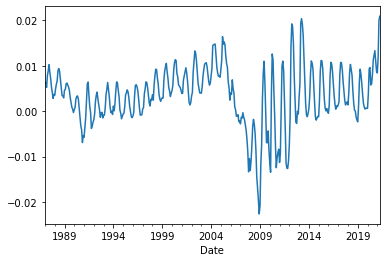

In [27]:
CS['pct_change'] = CS['Case-Shiller U.S. National Home Price Index'].pct_change()
CS['pct_change'].plot()

# conclusion - non stationary

In [35]:
CS

,Case-Shiller U.S. National Home Price Index,pct_change
Date,,
1987-01-31,63.737,NaN
1987-02-28,64.137,0.006276
1987-03-31,64.472,0.005223
1987-04-30,64.977,0.007833
1987-05-31,65.552,0.008849
...,...,...
2020-12-31,234.472,0.008811
2021-01-31,236.441,0.008398
2021-02-28,239.192,0.011635


## Random Forest

## XG Boost Model 

## LSTM RNN 
